# Stock Prediction Data

## Introduction
  * Supervised Learning Stock Prediction

## Load data

- use the getStockYF program to download stock data from Intrinio

In [1060]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
from io import StringIO
from IntrinioApiCredentials import *
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

# Paramters

ticker = "AAPL"  #  ^GSPC  Yahoo S&P ... SPX Intrinio S&P ... AAPL ...  
source='file' # ... doesn't matter
dataStartDate=dt.datetime(2007,1,1)  # 1990-01-01 ^GSPC Yahoo 
                     #... 2007-1-1 Intrinio ... need to give chance for nan to clear
today = dt.date.today()
startDate=str(dataStartDate.year)+'-'+str(dataStartDate.month)+'-'+str(dataStartDate.day)
endDate=str(today.year)+'-'+str(today.month)+'-'+str(today.day)

train_st = dataStartDate
test_st = dt.datetime(2014,1,1) # 2009-1-1 Intrinio ... need to give chance for nan to clear
test_et = dt.datetime(2017,4,12)
#test_et = dt.datetime(today.year,today.month,today.day)


In [1113]:
# Get Data
%run algosciquant.py

print('ticker = ',ticker)

if source == 'Intrinio':
    from IntrinioApiCredentials import *
    if ticker !='SPX':
        sitems=['adj_close_price',]
        dfs=getIntrinioStockData(ticker,startDate,endDate,api_username,api_password,items=sitems,v=0) # stock
        print(dfs.tail(5))
    dfsp=getIntrinisoSPData(startDate,endDate,api_username,api_password,v=0) # S&P
    print(dfsp.tail(5))
    
elif source == 'Yahoo':
    items=['adj_close_price','adj_volume']
    if ticker != '^GSPC':
        dfs=getYahooStockData(ticker,startDate,endDate,v=0) # stock data
        print(dfs.tail(5))
    dfsp=getYahooSPData(startDate,endDate,v=0) # S&P
    print(dfsp.tail(5))
    
elif source == 'file':
    if ticker == '^GSPC':
        dfsp = pd.read_csv('sp500.csv',index_col=0,parse_dates=True)
        dfsp = dfsp[dataStartDate:]
        print(dfsp.head(5))
        print('...')
        print(dfsp.tail(5))
    else:
        filename='stock_'+ticker+'.csv'
        dfs = pd.read_csv(filename,index_col=0,parse_dates=True)
        dfs = dfs[dataStartDate:]
        #dfs['pricetobook'] = pd.to_numeric(dfs['pricetobook'])
        
        print(dfs.head(5))
        print('...)')
        print(dfs.tail(5))
        
        

ticker =  AAPL
            adj_close_price  adj_high_price  adj_low_price  adj_open_price  \
date                                                                         
2007-01-03        10.857415       11.217601      10.611244       11.180027   
2007-01-04        11.098403       11.135976      10.860006       10.889805   
2007-01-05        11.019369       11.168367      10.935153       11.112655   
2007-01-08        11.073785       11.211123      11.049168       11.137272   
2007-01-09        11.993686       12.046807      11.032325       11.200758   

             adj_volume  close_price  earningsyield        ebitda  \
date                                                                
2007-01-03  309579900.0        83.80       0.064969  4.297183e+10   
2007-01-04  211815100.0        85.66       0.064969  4.297183e+10   
2007-01-05  208685400.0        85.05       0.064969  4.297183e+10   
2007-01-08  199276700.0        85.47       0.064969  4.297183e+10   
2007-01-09  837324600.0 

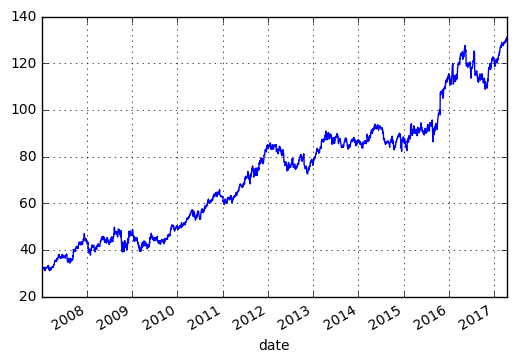

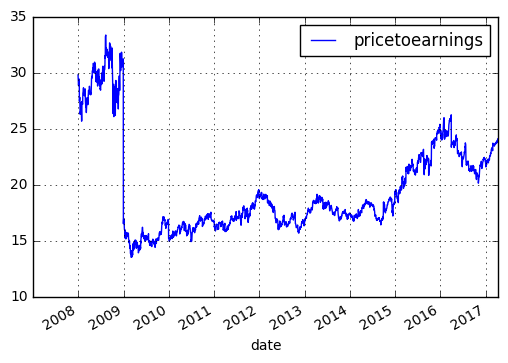

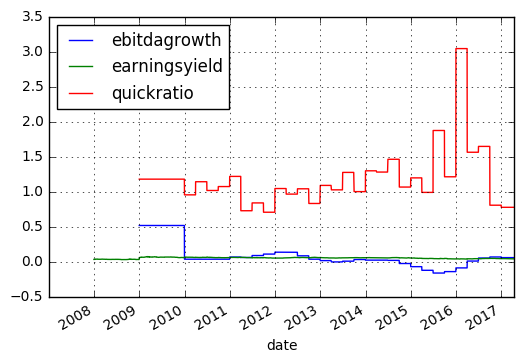

In [672]:

if ticker =='^GSPC':
    price_variable = 'close_price'
    df=dfsp
    df[price_variable].plot(grid=True)  


else:
    price_variable ='adj_close_price'
    df=dfs
    df[price_variable].plot(grid=True)   
    df[['pricetoearnings']].plot(grid=True)
    df[['ebitdagrowth','earningsyield','quickratio']].plot(grid=True)

In [1114]:
# Nday Trend (tnp1)
#   N Plus 1 .... predict today for N plus 1 (tomorrow)

    #tnp1=pd.DataFrame(np.sign(dfsp['close_price']).shift(-1))
    #tnp1=tnp1.rename(columns={'close_price':'t_np1'})
%run algosciquant
ndtrend = 45
print('ndtrend = ',ndtrend)

if ticker =='^GSPC':
    price_variable = 'close_price'
    df=dfsp
else:
    price_variable ='adj_close_price'
    df=dfs
    
print('ticker = ',ticker)
print('price_variable = ',price_variable)       

dx=0.01
dftruth,dfnday=ndTrendFill(df,price_variable,ndtrend,dx)

print(dftruth.columns)
print('...')
dftruth['t_np1'] = dftruth['t'].shift(-1)
del dftruth['t']
print("\ndftruth columns")
print(dftruth.columns)
print(dftruth.tail(5))

ndtrend =  45
ticker =  AAPL
price_variable =  adj_close_price
Index(['t'], dtype='object')
...

dftruth columns
Index(['t_np1'], dtype='object')
            t_np1
date             
2017-04-13    1.0
2017-04-17    1.0
2017-04-18    1.0
2017-04-19    1.0
2017-04-20    NaN


In [1115]:
# Ndtrend - save 

if ticker =='^GSPC':
    tick = 'sp'
    price_variable='close_price'
else:
    tick = ticker
    price_variable='adj_close_price'
ndt_save_filename=tick+'_ndt'+str(ndtrend)+'_'+str(test_st.year)+'_20170412.csv'
print('filename = ',ndt_save_filename)
dftruth.to_csv(ndt_save_filename)

filename =  AAPL_ndt45_2014_20170412.csv


In [770]:
# Read - Ndtrend Truth read filename
ndtrend=45
tick='AAPL'
ndt_read_filename=tick+'_ndt'+str(ndtrend)+'_'+str(test_st.year)+'_20170412.csv'
print('filename = ',ndt_read_filename)
dftruth = pd.read_csv(ndt_read_filename,index_col=0,parse_dates=True)

filename =  AAPL_ndt45_2014_20170412.csv


Index(['close_price', 'high_price', 'low_price', 'open_price', 'volume'], dtype='object')

In [1116]:
# ML Feature Data Frame

%run algosciquant
print(ticker)
f2p=[2,5,10,20,30,60,90,120]
if ticker == '^GSPC' or ticker == 'SPX':
    mlFeatures=['sp_close_price','sp_close_pricer','sp_volume','sp_volumer']
    #mlFeatures=['sp_close_pricer','sp_volumer','sp_close_price']
    #mlFeatures=['sp_close_pricer','sp_volumer']
    print('\nmlFeatures')
    print(mlFeatures)
    print('\ndfsp.columns')
    print(dfsp.columns)
    dfML=mlHistoryFeatures(dfsp,dfsp,mlFeatures,f2p)
    # S&P High and Low Relative to Open
    
    dfML['high_price_ropen']=dfsp['high_price']/dfsp['open_price']-1
    dfML['low_price_ropen']=dfsp['low_price']/dfsp['open_price']-1
    
else:   
    mlFeatures=['adj_close_price', 'adj_close_pricer', 'pricetoearnings','ebitdagrowth','quickratio','earningsyield' ,'sp_close_pricer','sp_close_price','sp_volume']
    #mlFeatures=['adj_close_pricer', 'pricetobook', 'sp_close_pricer','sp_volume']

    print('\nmlFeatures')
    print(mlFeatures)
    print('\ndfs.columns')
    print(dfs.columns)
    dfML=mlHistoryFeatures(dfs,dfsp,mlFeatures,f2p)
    #dfML['sp_volume']=dfsp['volume']
    #''adj_volume
    mlFeatures2=['adj_close_price','adj_volume']
    print('\nmlFeatures2')
    dfML[mlFeatures2]=dfs[mlFeatures2]


print("\nML features")
print(dfML.columns)

print('\nML Features (tail(3))')
print(dfML.tail(3))



AAPL

mlFeatures
['adj_close_price', 'adj_close_pricer', 'pricetoearnings', 'ebitdagrowth', 'quickratio', 'earningsyield', 'sp_close_pricer', 'sp_close_price', 'sp_volume']

dfs.columns
Index(['adj_close_price', 'adj_high_price', 'adj_low_price', 'adj_open_price',
       'adj_volume', 'close_price', 'earningsyield', 'ebitda', 'ebitdagrowth',
       'evtoebitda', 'evtorevenue', 'high_price', 'low_price', 'open_price',
       'pricetobook', 'pricetoearnings', 'quickratio', 'volume'],
      dtype='object')

mlFeatures2

ML features
Index(['sp_close_pricer', 'sp_close_price', 'sp_volume', 'adj_close_pricer',
       'adj_close_price', 'pricetoearnings', 'ebitdagrowth', 'quickratio',
       'earningsyield', 'adj_close_price_h1', 'adj_close_price_h2',
       'adj_close_price_ma5', 'adj_close_price_ma10', 'adj_close_price_ma20',
       'adj_close_price_ma30', 'adj_close_price_ma60', 'adj_close_price_ma90',
       'adj_close_price_ma120', 'adj_close_pricer_h1', 'adj_close_pricer_h2',
       'ad

In [414]:
# Find Null Rows
nullrows=sum([True for idx,row in dfML.iterrows() if any(row.isnull())])
nrows=len(dfML)
print("nrows = ",nrows,"null_rows = ",nullrows)

nrows =  2111 null_rows =  120


In [1121]:
#  Classifier Model Training and Prediction
#   for each test date a classifier will be trained until test date - 1

%run algosciquant 

# Create training data frames ... separate into X and Y
X = dfML.loc[train_st:test_et,dfML.columns]
Y = dftruth.loc[train_st:test_et]

print("X columns")
print(X.columns)

print('Y columns')
print(Y.columns)

mc=0
dftflag=pd.DataFrame()

##### Decision Treee
#ntraindays = 300
#v=1
#model='DT'
#clf = DecisionTreeClassifier(min_samples_split=20, random_state=99)

##### Random Forest
ne=366
v=2
ntraindays = 1000
model="RF"
clf = RandomForestClassifier(n_estimators=ne, random_state=2)

##### K Nearest Neighbor
#k=5
#model="KNN"
#clf=KNeighborsClassifier(n_neighbors=k,algorithm='auto')

#### XG Boost
#ntraindays = 1000
#v=2
#model="XGB"
#clf = XGBClassifier()

##### Support Vector Machine
#ntraindays = 3000
#v=2
#model=SVM"
#clf = svm.SVC(kernel='rbf', C=1,gamma='auto')

##### Gausian Naive-Bayes
#ntraindays = 2000
#v=1
#model = "GNB"
#clf = GaussianNB()

##### Logistic Regression
#ntraindays = 300
#v=1
#model = "LR"
#clf = LogisticRegression()

##### Run the classifier 
print('ticker =',ticker)
print('ndtrend = ',ndtrend)
print('test start date =',test_st)
print('ntraindays = ',ntraindays)
print('model = ',model)
dfTR,clf = mClfTrainTest(X,Y,train_st,test_st,test_et,clf,ntraindays,mc=mc,dftflag=dftflag,v=v)


dfTR[['train_st','train_et','t', 'p','tf','t_np1','p_np1']].tail(10)

X columns
Index(['sp_close_pricer', 'sp_close_price', 'sp_volume', 'adj_close_pricer',
       'adj_close_price', 'pricetoearnings', 'ebitdagrowth', 'quickratio',
       'earningsyield', 'adj_close_price_h1', 'adj_close_price_h2',
       'adj_close_price_ma5', 'adj_close_price_ma10', 'adj_close_price_ma20',
       'adj_close_price_ma30', 'adj_close_price_ma60', 'adj_close_price_ma90',
       'adj_close_price_ma120', 'adj_close_pricer_h1', 'adj_close_pricer_h2',
       'adj_close_pricer_ma5', 'adj_close_pricer_ma10',
       'adj_close_pricer_ma20', 'adj_close_pricer_ma30',
       'adj_close_pricer_ma60', 'adj_close_pricer_ma90',
       'adj_close_pricer_ma120', 'pricetoearnings_h1', 'pricetoearnings_h2',
       'pricetoearnings_ma5', 'pricetoearnings_ma10', 'pricetoearnings_ma20',
       'pricetoearnings_ma30', 'pricetoearnings_ma60', 'pricetoearnings_ma90',
       'pricetoearnings_ma120', 'ebitdagrowth_h1', 'ebitdagrowth_h2',
       'ebitdagrowth_ma5', 'ebitdagrowth_ma10', 'ebitdagrowth

,train_st,train_et,t,p,tf,t_np1,p_np1
date,,,,,,,
2017-03-30,2014-07-04,2017-03-28,1.0,1.0,1,1.0,1.0
2017-03-31,2014-07-05,2017-03-29,1.0,1.0,1,1.0,1.0
2017-04-03,2014-07-08,2017-03-30,1.0,1.0,1,1.0,1.0
2017-04-04,2014-07-09,2017-03-31,1.0,1.0,1,1.0,1.0
2017-04-05,2014-07-10,2017-04-03,1.0,1.0,1,1.0,1.0
2017-04-06,2014-07-11,2017-04-04,1.0,1.0,1,1.0,1.0
2017-04-07,2014-07-12,2017-04-05,1.0,1.0,1,1.0,1.0
2017-04-10,2014-07-15,2017-04-06,1.0,1.0,1,1.0,1.0
2017-04-11,2014-07-16,2017-04-07,1.0,1.0,1,1.0,1.0


In [1122]:
# Smooth Predictions
%run algosciquant 

if ticker == '^GSPC':
    price_variable2='close_price'
else:
    price_variable2=price_variable

startindex = dfnday.index[dfnday.index.searchsorted(test_st)]
print('startindex =',startindex)
dfps = ndTrendSmooth(dfTR,startindex,'p',ndtrend)
add_dftr_cols=['train_st','train_et','t','p','t_np1','p_np1']
dfps[add_dftr_cols]=dfTR[add_dftr_cols]
if ticker == '^GSPC':
    dfps[price_variable]=dfsp[price_variable]
else:
    dfps[price_variable]=dfs[price_variable]
print('ticker =',ticker)
print('price_variable =',price_variable)
dfps[[price_variable2,'train_st','train_et','t', 'p','t_np1','p_np1']].tail(5)

startindex = 2014-02-13 00:00:00
ticker = AAPL
price_variable = adj_close_price


,adj_close_price,train_st,train_et,t,p,t_np1,p_np1
date,,,,,,,
2017-04-06,143.66,2014-07-11,2017-04-04,1.0,1.0,1.0,1.0
2017-04-07,143.34,2014-07-12,2017-04-05,1.0,1.0,1.0,1.0
2017-04-10,143.17,2014-07-15,2017-04-06,1.0,1.0,1.0,1.0
2017-04-11,141.63,2014-07-16,2017-04-07,1.0,1.0,1.0,1.0
2017-04-12,141.80,2014-07-17,2017-04-10,1.0,1.0,1.0,1.0


In [1123]:
# save dfTR and dfps Training Results DataFrame File 
if ticker == '^GSPC':
    tick='sp'
else:
    tick=ticker

str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
str_test_styr=str(test_st.year)

save_dtr_filename='dfclfm_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
save_dfps_filename='dfps_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'

print('filename =',save_dtr_filename)
print('filename =',save_dfps_filename)
dfTR.to_csv(save_dtr_filename)
dfps.to_csv(save_dfps_filename)

filename = dfclfm_AAPL_ndt45_2014_2017412_RF.csv
filename = dfps_AAPL_ndt45_2014_2017412_RF.csv


In [1046]:
# read dfTR Training Results DataFrame File 
model='DT'
ticker='AAPL'
ndtrend=45
ftest_st=dt.datetime(2014,1,1)
ftest_et=dt.datetime(2017,4,12)

if ticker == '^GSPC':
    tick='sp'
else:
    tick=ticker

str_test_et=str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)
str_test_styr=str(ftest_st.year)

read_dtr_filename='dfclfm_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)+'_'+model+'.csv'
read_dfps_filename='dfps_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)+'_'+model+'.csv'

print('filename =',read_dtr_filename)
print('filename =',read_dfps_filename)
dfTR = pd.read_csv(read_dtr_filename,index_col=0,parse_dates=True)
dfps = pd.read_csv(read_dfps_filename,index_col=0,parse_dates=True)

filename = dfclfm_AAPL_ndt45_2014_2017412_DT.csv
filename = dfps_AAPL_ndt45_2014_2017412_DT.csv


In [914]:
%run algosciquant
clfMktConfusionMatrix(dfTR,"t",'p')

total = 1604 
  pos (up) =  649 
  neg (dwn) 954
errors = 96 correct =  1508


(1604,
 96,
 1508,
 0.059850374064837904,
 49,
 45,
 600,
 908,
 0.07550077041602465,
 0.04716981132075472,
 0.9244992295839753,
 0.9517819706498952,
               Actual Totals Predicted MktDwn Predicted MktUp
 actual MktDwn    pos:MktDwn               tp              fn
 actual MktUp      neg:MktUp               fp              tn,
                Actual Totals  Predicted MktDwn  Predicted MktUp
 actual MktDwn            649               600               49
 actual MktUp             954                45              908,
                Actual Totals  Predicted MktDwn  Predicted MktUp
 actual MktDwn            649          0.924499         0.075501
 actual MktUp             954          0.047170         0.951782)

In [526]:
%run algosciquant
clfMktConfusionMatrix(dfps,"t",'ps')

total = 838 
  pos (up) =  412 
  neg (dwn) 425
errors = 244 correct =  594


(838,
 244,
 594,
 0.2911694510739857,
 109,
 133,
 302,
 292,
 0.2645631067961165,
 0.3129411764705882,
 0.7330097087378641,
 0.6870588235294117,
               Actual Totals Predicted MktDwn Predicted MktUp
 actual MktDwn    pos:MktDwn               tp              fn
 actual MktUp      neg:MktUp               fp              tn,
                Actual Totals  Predicted MktDwn  Predicted MktUp
 actual MktDwn            412               302              109
 actual MktUp             425               133              292,
                Actual Totals  Predicted MktDwn  Predicted MktUp
 actual MktDwn            412          0.733010         0.264563
 actual MktUp             425          0.312941         0.687059)

In [32]:
dfsp.tail(5)

,close_price,high_price,low_price,open_price,volume
2017-03-30,2368.060059,2370.419922,2358.580078,2361.310059,3158420000
2017-03-31,2362.719971,2370.350098,2362.600098,2364.820068,3354110000
2017-04-03,2358.840088,2365.870117,2344.729980,2362.340088,3416400000
2017-04-04,2360.159912,2360.530029,2350.719971,2354.760010,3206240000
2017-04-05,2354.230000,2378.360000,2350.520000,2366.590000,3206240000


In [232]:
# Learning Summary Results

# Date 2017-04-14
# S&P 2014-01-01 to 2017-04-12
# S&P close_price 2014-01-12, 2344.93


# S&P500 2014-01-01 to 2017-04-05
# DT, ndraindays = 300 ... decreasing accuracy in incrasing ndtraining days
# ndtrend = 45
#  mlFeatures 
#       sp_close_price, f2p=[2,5,10,20,30,60,90,120] -->   14.2509 % error
#       sp_close_price, f2p=[5,5,10,20,30,60,90,120] -->   12.667 % error
#       sp_close_price, f2p=[6,5,10,20,30,60,90,120] -->   12.7 % error
#      + sp_close_pricer, f2p=[5,5,10,20,30,60,90,120] --> 12.4% error 
#      + relative intra-day high and low to open --> 13.03%
#      + sp_volume --> 13.5%
#      + sp_volumer --> 13.5%

# RF, ndtraining = 1000 ... did not see improvement in increasing ndtraining days
#  ndtrend=45
#      sp_close_price, f2p=[5,5,10,20,30,60,90,120] -->   13.64% error
#      +sp_close_pricer f2p=[5,5,10,20,30,60,90,120] ---> 15.9 % error
#      +sp_volume  --> 12.5% error
#      +sp_volumer  --> 10.109% error
#      + intra-day relative intra-day high/low to open  --> 10.5968 %error
#    **f2p=[2,5,10,20,30,60,90,120]   ---> 9.6224 %
#      f2p=[3,5,10,20,30,60,90,120]   ---> 9.98782 %
#      sp_close_price, sp_close_pricer, f2p=[2,5,10,20,30,60,90,120] -->   14.9% error

    sp_rf_error  sp_rf_price_st  sp_dt_error  sp_dt_price_st  AAPL_dt_error  \
1      0.116000         1828.54      0.19600         1876.33       0.409300   
2      0.187600         2056.84      0.25790         1876.66       0.443900   
3      0.259100         2083.33      0.35400         2386.42       0.464200   
5      0.300200         2546.66      0.37700         2128.16       0.416500   
10     0.289350         2835.65      0.33170         2672.52       0.354400   
20     0.193700         2943.31      0.21600         2652.51       0.202063   
30     0.169500         2764.85      0.21000         2647.47       0.174200   
40     0.096852         3066.15      0.12100         3021.46       0.110980   
45     0.095640         2683.86      0.14400         2797.20       0.103800   
50     0.111380         2587.90      0.14116         2544.21       0.115800   

    AAPL_dt_st  AAPL_rf_error  AAPL_rf_st  MCD_dt_error  MCD_dt_st  \
1       85.430         0.2768       83.75        0.2733    1

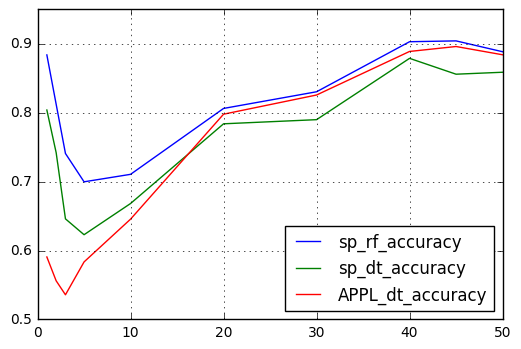

In [857]:
# Training Results Summary
# Date 2017-04-14

columns=['sp_rf_error','sp_rf_price_st','sp_dt_error', 'sp_dt_price_st','AAPL_dt_error','AAPL_dt_st','AAPL_rf_error' ,'AAPL_rf_st' ,'MCD_dt_error','MCD_dt_st']
index=[1,2,3,5,10,20,30, 40,45, 50]

results=[(0.116,1828.54,0.196, 1876.33 ,0.4093,85.43,0.2768, 83.75  ,0.2733,116.87),     # 1
         (0.1876,2056.84,0.2579,1876.66 ,0.4439,82.9,0.3723 ,85.97 ,0.324,111.95),      # 2
         (0.2591,2083.33,0.354,2386.42 ,0.4642,171.1, 0.4439,143.81,0.335,117.44),      # 3
         (0.3002,2546.660,0.377,2128.16 ,0.4165,114.02,0.3759 ,196.71 ,0.4268,141.93),    # 5
         (0.28935,2835.65,0.3317,2672.52 ,0.3544,234.13,0.2613 ,318.64,0.3047,141.34),   # 10
         (0.1937,2943.31,0.216,2652.51 ,0.202063,255.6, 0.1146,243.93 ,0.2189,165.65),    # 20
         (0.1695,2764.850,.21,2647.47 ,0.1742,237.91,.101 ,247.45 ,0.1342,146.08),       # 30  
         (0.096852,3066.15,0.121, 3021.46,0.11098,245.015,0.0847 ,226.48 ,0.0955,200.255), # 40
         (0.09564, 2683.86, 0.144 , 2797.20 ,0.1038,261.3,0.0573 ,268.31 ,0.1294,137.19),  # 45
         (0.11138, 2587.9, 0.14116,2544.21 ,0.1158, 218.91,0.0537,231.42 ,0.1027,175.55)]  # 50

#print(dftrainresults[['sp_rf_error','sp_dt_error','AAPL_dt_error']])

# S&P close_price 2014-01-12, $2344.93
#   index = ndtrend days
#   S&P 2014-01-01 to 2017-04-12
#   features - sp_close_price, sp_close_pricr, volume, volumer, 
#
# AAPL 
#  # 2014-01-01 to 2017-04-1
#  start price 72.124, end price 141.79
#  f2p=[2,5,10,20,30,60,90,120]
#
# MCD
#  # 2014-01-01 to 2017-04-1
#  start price 86.67, end price 131.21
#  f2p=[2,5,10,20,30,60,90,120]
#   DT 55, 9.55, 153.96

 
dftrainresults=pd.DataFrame(results,columns=columns,index=index)
dftrainresults['sp_rf_accuracy']=1-dftrainresults['sp_rf_error']
dftrainresults['sp_dt_accuracy']=1-dftrainresults['sp_dt_error']
dftrainresults['APPL_dt_accuracy']=1-dftrainresults['AAPL_dt_error']
dftrainresults[['sp_rf_accuracy','sp_dt_accuracy','APPL_dt_accuracy']].plot(use_index=True,grid=True)
plt.xlim(0,50)
#print(dftrainresults[['sp_rf_accuracy','sp_dt_accuracy','APPL_dt_accuracy']])
print(dftrainresults)

In [213]:
# Read - Ndtrend Truth read filename

ftp_40='sp_ndt40_'+'1950_20170412.csv'
ftp_30='sp_ndt30_'+'1950_20170412.csv'
df1 = pd.read_csv(ftp_40,index_col=0,parse_dates=True)
df2 = pd.read_csv(ftp_30,index_col=0,parse_dates=True)

df1=df1.rename(columns={'t_np1':'tnp1_40'})
df2=df2.rename(columns={'t_np1':'tnp1_30'})

dftp=pd.concat([df1,df2],axis=1)
dftp.head(5)

,tnp1_40,tnp1_30
1990-01-02,-1.0,-1.0
1990-01-03,-1.0,-1.0
1990-01-04,-1.0,-1.0
1990-01-05,-1.0,-1.0
1990-01-08,-1.0,-1.0


Index(['ps', 'train_st', 'train_et', 't', 'p', 't_np1', 'p_np1',
       'adj_close_price'],
      dtype='object')
ticker = AAPL


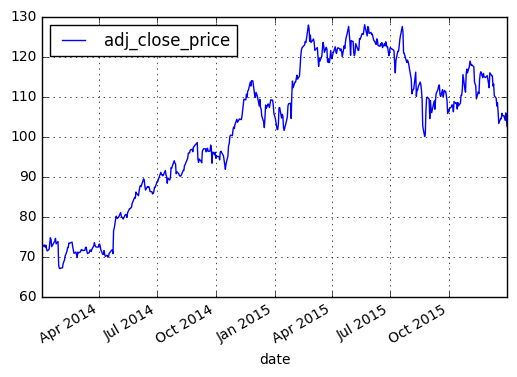

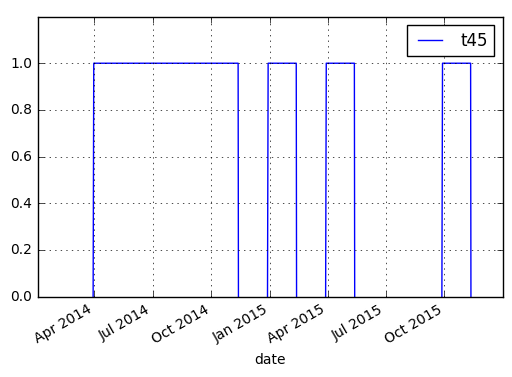

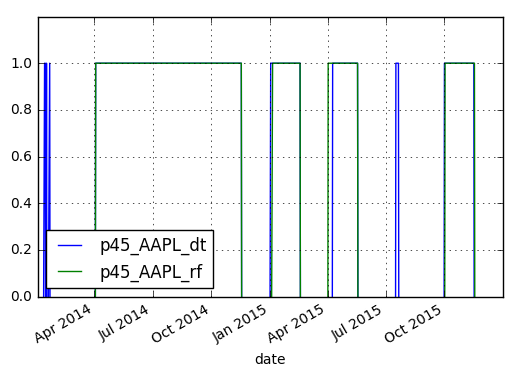

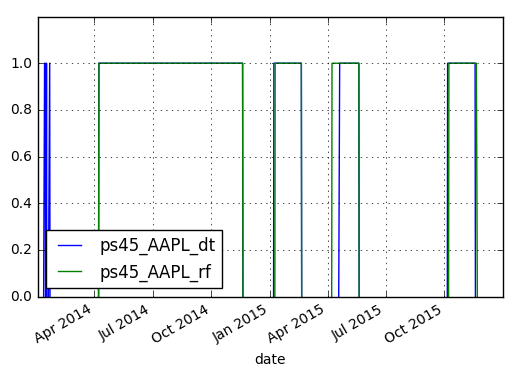

In [1146]:
# Graph T,P,PS files

tick='AAPL'


if tick == '^GSPC':
    st=dt.datetime(2008,1,1)
    et=dt.datetime(2008,12,31)
    price_variable='close_price'
    fps_dt_45 = 'dfps_sp_ndt45_2000_2017412_DT.csv'
    fps_dt_40 = 'dfps_sp_ndt40_2000_2017412_DT.csv'
    fps_rf_40 = 'dfps_sp_ndt40_2000_2017412_RF.csv'
    fps_dt_30 = 'dfps_sp_ndt30_2000_2017412_DT.csv'
    fps_dt_20 = 'dfps_sp_ndt20_2000_2017412_DT.csv'
    fps_dt_10 = 'dfps_sp_ndt10_2000_2017412_DT.csv'


if tick =='AAPL':
    st=dt.datetime(2014,1,1)
    et=dt.datetime(2015,12,31)
    #st=dt.datetime(2014,12,1)
    #et=dt.datetime(2015,6,1)
    #st=dt.datetime(2015,3,22)
    #et=dt.datetime(2015,4,12)
    price_variable='adj_close_price'
    fps_dt_45 = 'dfps_AAPL_ndt45_2014_2017412_DT.csv'
    fps_rf_45 = 'dfps_AAPL_ndt45_2014_2017412_RF.csv'
    fps_dt_40 = 'dfps_AAPL_ndt40_2014_2017412_DT.csv'
    fps_rf_40 = 'dfps_AAPL_ndt40_2014_2017412_RF.csv'
    fps_dt_30 = 'dfps_AAPL_ndt30_2014_2017412_DT.csv'
    fps_rf_30 = 'dfps_AAPL_ndt30_2014_2017412_RF.csv'
    fps_dt_20 = 'dfps_AAPL_ndt20_2014_2017412_DT.csv'
    fps_dt_10 = 'dfps_AAPL_ndt10_2014_2017412_DT.csv'
    dfps_rf_45 = pd.read_csv(fps_rf_45,index_col=0,parse_dates=True)

dfps_dt_45 = pd.read_csv(fps_dt_45,index_col=0,parse_dates=True)
dfps_dt_40 = pd.read_csv(fps_dt_40,index_col=0,parse_dates=True)
dfps_rf_40 = pd.read_csv(fps_rf_40,index_col=0,parse_dates=True)
dfps_dt_30 = pd.read_csv(fps_dt_30,index_col=0,parse_dates=True)
dfps_dt_20 = pd.read_csv(fps_dt_20,index_col=0,parse_dates=True)
dfps_dt_10 = pd.read_csv(fps_dt_10,index_col=0,parse_dates=True)

print(dfps_dt_40.columns)
dftp=dfps_dt_40[[price_variable,'t','p','ps']].copy()
dftp.rename(columns={'t':'t40','p':'p40_dt','ps':'ps40_dt'},inplace=True)

dftp[['t45','p45_dt','ps45_dt']]=dfps_dt_45[['t','p','ps']]
dftp[['p40_dt','ps40_dt']]=dfps_dt_40[['p','ps']]
dftp[['p45_rf','ps45_rf']]=dfps_rf_45[['p','ps']]
dftp[['t30','p30_dt','ps30_dt']]=dfps_dt_30[['t','p','ps']]
dftp[['t20','p20_dt','ps20_dt']]=dfps_dt_20[['t','p','ps']]
dftp[['t10','p10_dt','ps10_dt']]=dfps_dt_10[[ 't','p','ps']]
dftp.loc[st:et,[price_variable]].plot(grid=True)

dftmp=dftp.loc[st:et,['t45']]
dftmp['t40']=dftp.loc[st:et,['t40']]+0.0125
dftmp['t30']=dftp.loc[st:et,['t30']]+0.025
dftmp['t20']=dftp.loc[st:et,['t20']]+0.0375
dftmp['t10']=dftp.loc[st:et,['t10']]+0.05


print('ticker =',tick)
if tick=='^GSPC':
    dftmp['p40_sp_dt']=dftp.loc[st:et,['p40_dt']]
    dftmp['ps40_sp_dt']=dftp.loc[st:et,['ps40_dt']]
    dftmp['t40']=dftp.loc[st:et,['t40']]+0.0125
    dftmp['t30']=dftp.loc[st:et,['t30']]+0.025
    dftmp['t20']=dftp.loc[st:et,['t20']]+0.0375
    dftmp['t10']=dftp.loc[st:et,['t10']]+0.05

    dftmp.loc[st:et,['t40']].plot(grid=True)

    plt.ylim(0,1.2)
    dftmp.loc[st:et,['p40_sp_dt','p40_sp_rf']].plot(grid=True)
    plt.ylim(0,1.2)
    dftmp.loc[st:et,['ps40_sp_dt','ps40_sp_rf']].plot(grid=True)
    plt.ylim(0,1.2)
    
else:
    
    dftmp['p45_AAPL_dt']=dftp.loc[st:et,['p45_dt']]
    dftmp['ps45_AAPL_dt']=dftp.loc[st:et,['ps45_dt']]
    dftmp['ps45_AAPL_rf']=dftp.loc[st:et,['ps45_rf']]
    dftmp['p45_AAPL_rf']=dftp.loc[st:et,['p45_rf']]
    dftmp['p40_AAPL_dt']=dftp.loc[st:et,['p40_dt']]
    dftmp['p30_AAPL_dt']=dftp.loc[st:et,['p30_dt']]
    dftmp['p20_AAPL_dt']=dftp.loc[st:et,['p20_dt']]
    dftmp['p10_AAPL_dt']=dftp.loc[st:et,['p10_dt']]
    
    dftmp.loc[st:et,['t45']].plot(grid=True)
    plt.ylim(0,1.2)
    dftmp.loc[st:et,['p45_AAPL_dt','p45_AAPL_rf']].plot(grid=True)
    plt.ylim(0,1.2)
    dftmp.loc[st:et,['ps45_AAPL_dt','ps45_AAPL_rf']].plot(grid=True)
    plt.ylim(0,1.2)




#dftmp.loc[st:et,['t45','t40','t30','t20','t10']].plot(grid=True)
#plt.ylim(0,1.2)


In [934]:
# read dfTR Training Results DataFrame File 
model='DT'
ticker='AAPL'
ndtrend=45

ftest_st=dt.datetime(2008,1,1)
ftest_et=dt.datetime(2017,4,12)

if ticker == '^GSPC':
    tick='sp'
else:
    tick=ticker

str_test_et=str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)
str_test_styr=str(ftest_st.year)

read_dtr_filename='dfclfm_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)+'_'+model+'.csv'
read_dfps_filename='dfps_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)+'_'+model+'.csv'

print('filename =',read_dtr_filename)
print('filename =',read_dfps_filename)
dfTR = pd.read_csv(read_dtr_filename,index_col=0,parse_dates=True)
dfps = pd.read_csv(read_dfps_filename,index_col=0,parse_dates=True)

filename = dfclfm_AAPL_ndt45_2008_2017412_DT.csv
filename = dfps_AAPL_ndt45_2008_2017412_DT.csv


In [76]:
print(model)

RF


In [935]:
# Strategy Trade CLF
%run algosciquant

pvariable='p'   #, p, ps, mcupm

start_strategy_trade=dfps.index[0]


#start_strategy_trade=test_st
startyr=start_strategy_trade.year
today = dt.date.today()
end_strategy_trade=dt.datetime(today.year,today.month,today.day)
endyr=today.year
startyr=start_strategy_trade.year
yday = datetime.today().timetuple().tm_yday


print('start strategy trade date =',start_strategy_trade)
print('end date =',test_et)

print(ticker)
if ticker == '^GSPC' or ticker == 'SPX':
    price_variable='close_price'  # Price Intrinio
else:
    
    price_variable='adj_close_price'

print(price_variable) 
print('model =',model)
print('ndtrend =',ndtrend)

df1=dfps.loc[start_strategy_trade:end_strategy_trade,[price_variable+'r','t','p','ps','t_np1','p_np1']]

if price_variable in dfsp.columns:
    df2=dfsp.loc[start_strategy_trade:end_strategy_trade,[price_variable]] 
elif price_variable in dfs.columns:
    df2=dfs.loc[start_strategy_trade:end_strategy_trade,[price_variable]] 

dft=pd.concat([df1, df2], axis=1,join='inner')
dft = tradeReturns(dft,price_variable)

dft = strategyTrade(dft,price_variable,price_variable+'_R',pvariable)

if price_variable in dfsp.columns:
    dft.loc[dft.index[0],price_variable+'_SP']=dft.loc[dft.index[0],price_variable]
    print(dft[[price_variable,price_variable+'_R',price_variable+'_SP','t',pvariable,'t_np1','p_np1']].head(5))

    print(dft[[price_variable,price_variable+'_R',price_variable+'_SP','t',pvariable,'t_np1','p_np1']].tail(5))
elif price_variable in dfs.columns:
    dft.loc[dft.index[0],price_variable+'_SP']=dft.loc[dft.index[0],price_variable]
    print(dft[[price_variable,price_variable+'_R',price_variable+'_SP','t',pvariable,'t_np1','p_np1']].head(5))
    print(dft[[price_variable,price_variable+'_R',price_variable+'_SP','t',pvariable,'t_np1','p_np1']].tail(5))

start strategy trade date = 2008-06-02 00:00:00
end date = 2017-04-12 00:00:00
AAPL
adj_close_price
model = DT
ndtrend = 45
            adj_close_price  adj_close_price_R  adj_close_price_SP    t    p  \
date                                                                           
2008-06-02        24.111752           0.000000           24.111752  NaN  NaN   
2008-06-03        24.017171          -0.003923           24.111752 -1.0  0.0   
2008-06-04        23.993850          -0.000971           24.111752 -1.0 -1.0   
2008-06-05        24.543199           0.022895           24.111752 -1.0 -1.0   
2008-06-06        24.052153          -0.020007           24.111752 -1.0 -1.0   

            t_np1  p_np1  
date                      
2008-06-02   -1.0    0.0  
2008-06-03   -1.0   -1.0  
2008-06-04   -1.0   -1.0  
2008-06-05   -1.0   -1.0  
2008-06-06   -1.0   -1.0  
            adj_close_price  adj_close_price_R  adj_close_price_SP    t    p  \
date                                          

In [936]:
# BackTest Summary
%run algosciquant

print(price_variable) 
print('model =',model)
print('ndtrend =',ndtrend)
(dftsummary,dfreturns)=backTest(dft,price_variable,start_strategy_trade,end_strategy_trade)

print(dftsummary)
print("")
print(dfreturns[[ 'nyear',  'Rc','Ra','Rc_strat','Ra_strat']])

adj_close_price
model = DT
ndtrend = 45
     start_date  start_adj_close_price   end_date  end_adj_close_price  \
2008 2008-06-02              24.111752 2008-12-31            11.058238   
2009 2009-01-02              11.757880 2009-12-31            27.303159   
2010 2010-01-04              27.727867 2010-12-31            41.791977   
2011 2011-01-03              42.700216 2011-12-31            52.473185   
2012 2012-01-03              53.280365 2012-12-31            69.573349   
2013 2013-01-02              71.777153 2013-12-31            75.181160   
2014 2014-01-02              74.123837 2014-12-31           105.717791   
2015 2015-01-02             104.712140 2015-12-31           102.527296   
2016 2016-01-04             102.614959 2016-12-31           115.323591   
2017 2017-01-03             115.652177 2017-04-12           141.800000   

      start_adj_close_price_SP  end_adj_close_price_SP    return  return_SP  
2008                 24.111752               20.730108 -0.541376  -

In [938]:
#Save Trade Summaries

if ticker == '^GSPC':
    tick='sp'
else:
    tick=ticker


str_test_styr=str(start_strategy_trade.year)
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)

save_dft_filename='dft_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
save_dfts_filename='dfts_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
save_dftrs_filename='dftrs_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'

print('dft filename =',save_dft_filename)
print('dfts filename =',save_dfts_filename)
print('dftrs filename =',save_dftrs_filename)
dft.to_csv(save_dft_filename)
dftsummary.to_csv(save_dfts_filename)
dfreturns.to_csv(save_dftrs_filename)

#save_dft_filename=dft_

dft filename = dft_AAPL_ndt45_2008_2017412_DT.csv
dfts filename = dfts_AAPL_ndt45_2008_2017412_DT.csv
dftrs filename = dftrs_AAPL_ndt45_2008_2017412_DT.csv


In [939]:
# read trade summary files
model='DT'
ticker='AAPL'
ndtrend=45

ftest_st=dt.datetime(2008,1,1)
ftest_et=dt.datetime(2017,4,12)

if ticker == '^GSPC':
    tick='sp'
else:
    tick=ticker

str_test_et=str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)
str_test_styr=str(ftest_st.year)

read_dft_filename='dft_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str(ftest_et.year)+str(ftest_et.month)+str(ftest_et.day)+'_'+model+'.csv'
read_dfts_filename='dfts_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
read_dftrs_filename='dftrs_'+tick+'_ndt'+str(ndtrend)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'


print('filename =',read_dft_filename)
print('dfts filename =',read_dfts_filename)
print('dftrs filename =',read_dftrs_filename)

dft = pd.read_csv(read_dft_filename,index_col=0,parse_dates=True)
dftsummary = pd.read_csv(read_dfts_filename,index_col=0,parse_dates=True)
dfreturns = pd.read_csv(read_dftrs_filename,index_col=0,parse_dates=True)

filename = dft_AAPL_ndt45_2008_2017412_DT.csv
dfts filename = dfts_AAPL_ndt45_2008_2017412_DT.csv
dftrs filename = dftrs_AAPL_ndt45_2008_2017412_DT.csv


start date =  2014-01-01 00:00:00 
end date = 2016-12-31 00:00:00


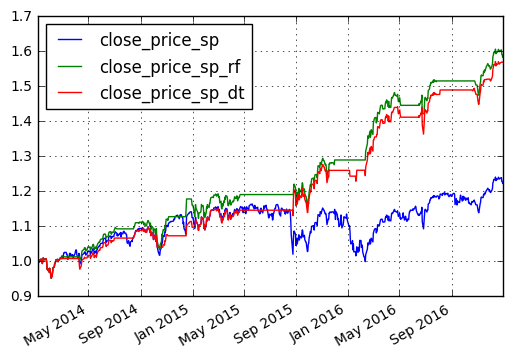

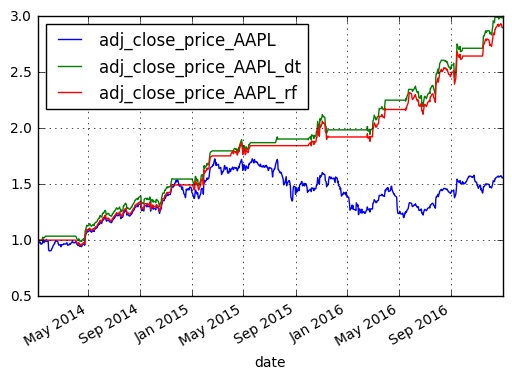

In [984]:
# Graph results ...  normalized trade data frame with start and end times

#st = test_st
#et = test_et

#st = dt.datetime(2000,1,1)
#et = dt.datetime(2003,12,31)

#st = dt.datetime(2008,6,1)
#et = dt.datetime(2009,12,31)

st = dt.datetime(2014,1,1)
et = dt.datetime(2016,12,31)

print('start date = ',st,'\nend date =',et)

# plot start and end times

pst=st
pet=et

#pst = dt.datetime(2011,1,1)
#pet = dt.datetime(2011,12,31)


# Read

f_sp_dft_rf='dft_sp_ndt40_2000_2017412_RF.csv'
f_sp_dft_dt='dft_sp_ndt40_2000_2017412_DT.csv'
f_AAPL_dft_rf='dft_AAPL_ndt45_2011_2017412_RF.csv'
f_AAPL_dft_dt='dft_AAPL_ndt45_2008_2017412_DT.csv'

dft_sp_rf= pd.read_csv(f_sp_dft_rf,index_col=0,parse_dates=True)
dft_sp_dt= pd.read_csv(f_sp_dft_dt,index_col=0,parse_dates=True)

dft_AAPL_rf= pd.read_csv(f_AAPL_dft_rf,index_col=0,parse_dates=True)
dft_AAPL_dt= pd.read_csv(f_AAPL_dft_dt,index_col=0,parse_dates=True)

dft_sp_rf.loc[dft_sp_rf.index[0],'close_price_SP']=dft_sp_rf.loc[dft_sp_rf.index[0],'close_price']
dft_sp_dt.loc[dft_sp_dt.index[0],'close_price_SP']=dft_sp_rf.loc[dft_sp_dt.index[0],'close_price']

# Normalize
dftn=dft_sp_rf.loc[st:et,['close_price','close_price_SP']]/dft_sp_rf.loc[dft_sp_rf.index[0],'close_price'].copy()
dftn_i0=dftn.index[0]
dftn['close_price_sp']=dftn['close_price']/dftn.loc[dftn_i0,'close_price']
dftn['close_price_sp_rf']=dft_sp_rf.loc[st:et,'close_price_SP']/dft_sp_rf.loc[dftn_i0,'close_price_SP']
dftn['close_price_sp_dt']=dft_sp_dt.loc[st:et,'close_price_SP']/dft_sp_dt.loc[dftn_i0,'close_price_SP']
del dftn['close_price_SP']
del dftn['close_price']

if st >= dt.datetime(2008,6,1):
    dftn_AAPL=dft_AAPL_dt.loc[st:et,['adj_close_price','adj_close_price_SP']]
    dftn_AAPL_i0=dftn_AAPL.index[0]
    dftn_AAPL['adj_close_price_AAPL']=dftn_AAPL['adj_close_price']/dftn_AAPL.loc[dftn_AAPL_i0,'adj_close_price']
    dftn_AAPL['adj_close_price_AAPL_dt']=dft_AAPL_dt.loc[st:et,'adj_close_price_SP']/dft_AAPL_dt.loc[dftn_AAPL_i0,'adj_close_price_SP']
    del dftn_AAPL['adj_close_price_SP']
    del dftn_AAPL['adj_close_price']
    
if st >= dt.datetime(2011,1,1):
    dftn_AAPL['adj_close_price_AAPL_rf']=dft_AAPL_rf.loc[st:et,'adj_close_price_SP']/dft_AAPL_rf.loc[dftn_AAPL_i0,'adj_close_price_SP']


# Graph Results
dftn.loc[pst:pet,['close_price_sp','close_price_sp_rf','close_price_sp_dt']].plot(grid=True)


if st >= dt.datetime(2008,6,1):
    dftn_AAPL.loc[pst:pet,['adj_close_price_AAPL','adj_close_price_AAPL_dt','adj_close_price_AAPL_rf']].plot(grid=True)




In [398]:
# http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html


dotf = "dt.dot"
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open(dotf, 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        

# the following command will export "dt.dot" file
visualize_tree(clf, X.columns)

# run the following command in the directory contaning "dt.dot" file
# > dot -Tpng dt.dot -o dt.png
# > open dt.png

## References

- Find stocks, [Kiplinger 8 Stocks](http://www.kiplinger.com/slideshow/investing/T052-S003-8-stocks-to-buy-now-for-2017/index.html)

- Kiplingers, "10 Great Stocks for the Next 10 Years", December 2016,   PNRA, ADBE, DHR, FBHS, IDXX, LGF

- Kiplingers, "8 Stocks to buy for now", Jan 2017, GOOG, CMD, AAPL, MEDP

- Kiplingers, "My Top Stock Picks for 2017," Jan 2017, AMZN, CVU, SBUX, CRM

- Other stocks, BRK.B, ^GSPC, KO

- Stanford ML CS229 Trend Stock Prediction,  [Stanford CS229 ML Stock Prediction](http://cs229.stanford.edu/proj2013/DaiZhang-MachineLearningInStockPriceTrendForecsting.pdf) ... **ML Features** PE ratio, PX volume, PX ebitda, current enterprise value, 2-day net price change, 10-day volatility, 50-day moving average, 10-day moving average, quick ratio, alpha overridable, alpha for beta pm, beta raw overridable, risk premium, IS EPS, and corresponding S&P 500 index
- CS229 Stock Prediction Feature Selection, ...  http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf  ... 

- Stanford ML CS229 Text/Article Stock Prediction, [CS229 Bryce Taylor](http://cs229.stanford.edu/proj2013/Taylor-Applying%20Machine%20Learning%20to%20Stock%20Market%20Trading.pdf)
    
- Stock correlations, [Asset Correlations](https://www.portfoliovisualizer.com/asset-correlations)
    
- Example noteboek, [Python Clustering](http://brandonrose.org/clustering)

- Where to get financial data, Quroa - Intrinio, <https://www.quora.com/What-are-some-cheaper-alternatives-to-Bloomberg-data-terminal>

- Intrino, <https://intrinio.com> ... <http://blog.intrinio.com/intrinio-financial-data-in-r-and-rstudio/>  ... API  <http://blog.intrinio.com/stock-api-developers/> ...  <http://docs.intrinio.com>  ... Python Github https://github.com/nhedlund/intrinio .... http://docs.intrinio.com/tags/intrinio-public#data-point .... Converasation with Andrew Carpenter, Intrinio.com ... What I used R for, which I bet you can do better in Python, is to pull in historical prices and then a vector of historical explainatory variables on the same time period. I automated it, and filled forward the quarterly data to match the daily data. Which is the standard in the industry, I learn from my professors. So that gives you a nice clean data frame with as many explainatory variables as you want- valuation metrics, earnings, economic indicators like SPY and VIX. acarpenter@intrinio.com 727-331-3416. ... from the API page  <http://blog.intrinio.com/stock-api-developers/>  good info plus make sure to watch the video. Entire price history using "price" endpoint "https://inntrinio.com/prices?ticker=AAPL" includes 13 data points open, close, adj_high, ... volume  ... use datapoint function to pull in specific data points "https://inntrinio.com/datapoint?ticker=AAPL&item=close_price" ... use the "historical_data" endpoint to pull in time-series "https://inntrinio.com/historical_data?ticker=AAPL&item=pricetoearnings&start_date=2014-01-01&end_date_2015-01-01" ... you can also add in a frequency as "&frequency=yearly"   (yearly, quarterly, monthly, weekly, daily) ... or just the start_date ... **Historical Data Features**  <http://docs.intrinio.com/tags/intrinio-public#historical-data> ... **Modeling financial data in R** ... http://blog.intrinio.com/modeling-financial-data-in-r-with-intrinio/